# Week 4 - Counting Words & Phrases

Assignment 4 by Chu Zhuang

In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import re
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## Load and organize our corpora into Dataframe

This is a new copora for my final project, which records social interaction between two people when they are trying to 'debate/discuss' a moral problem in an experiment setting. Two conditions are manipulated in this experiment: 1) one is **Thank you because**: Person A was instructed to respond with gratitude and understanding of Person B's statement before sharing his/her own, for example,--'thank you for sharing your opinion, because I think...'; 2) the other one is **No because**: Person A was instructed to respond with negation and stated her opinion directly, for example, 'No..I think..because'. This study wants to see whether showing gratitude could help people better understand each other's view point and reach an agreement. 

In the content analysis for the final project, we hope to first of all analze the degree of 'gratitude' in the conversation corpora from linguistic features, by annotation, and examine the degree of 'gratitude'expresed in the corpora in each condition and each pair. 

Currently, we obtain a copora of 12 pairs'conversation and organize them into a Dataframe, to record both the conversation text, experiment condition, and also the texts for each Person A and Person B, shown as below:

In [44]:
file_num=['5','6','7','8','9','11','12','13','54','55','58','59']
condition=['NB','TYB','NB','TYB','TYB','TYB','NB','NB','TYB','TYB','TYB','NB']
conversation_txt_all=[]
conversation_txt_A_all=[]
conversation_txt_B_all=[]
    
# read each file 
for i in range(12):
    filename=file_num[i]+'_otter.ai.txt'
    with open(filename, encoding='utf-8') as f:
        lines=f.readlines()
    
    conversation_txt=[]
    conversation_txt_A=[]
    conversation_txt_B=[]
    for line in lines[:-1]:
        re_person=r'Person (A|B)'
        find_person=re.search(re_person,line)
        if find_person:
            person_id=find_person.group(1)
        else:
            line=re.sub(r'\n','',line)
            if line:
                #print(line)
                conversation_txt.append(line)        
                if person_id=='A':
                    conversation_txt_A.append(line)
                elif person_id=='B':
                    conversation_txt_B.append(line)
                    
    conversation_txt=' '.join(conversation_txt)       
    conversation_txt_A=' '.join(conversation_txt_A)    
    conversation_txt_B=' '.join(conversation_txt_B)    
    
    conversation_txt_all.append(conversation_txt)
    conversation_txt_A_all.append(conversation_txt_A)
    conversation_txt_B_all.append(conversation_txt_B)

#organize into a dataframe
df_con=pandas.DataFrame({'condition':condition,'conversation_txt':conversation_txt_all,'con_txt_A':conversation_txt_A_all,'con_txt_B':conversation_txt_B_all})

In [ ]:
#tyb_transcript=df_con['convseration_txt'].sum()

In [45]:
df_con

,condition,conversation_txt,con_txt_A,con_txt_B
0,NB,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn..."
1,TYB,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...
2,NB,"Uh, so, uh I-I actually uh read a lot about th...",Ok and so what does the law say? Does it say l...,"Uh, so, uh I-I actually uh read a lot about th..."
3,TYB,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...
4,TYB,"I'm good whenever you are Okay, let's start, y...","Okay, let's start, yea [laugh] Yeah, so um I t...","I'm good whenever you are So I guess like, wha..."
5,TYB,I just strongly believe in the right to um {{}...,I like what you said about like the right to. ...,I just strongly believe in the right to um {{}...
6,NB,"Yea, so so so. What do you--what do you person...","I think that the US, I answered that the US sh...","Yea, so so so. What do you--what do you person..."
7,NB,"Okay, um, so I put a four. I like very minorly...",I disagree. I put I put a 10 for this. And I...,"Okay, um, so I put a four. I like very minorly..."
8,TYB,"No. Yeah, that makes sense. And I, yeah, I app...","No. Yeah, that makes sense. And I, yeah, I app...",What do you know about herd immunity? Yeah.
9,TYB,"Oh, I think I strongly disagreed. Did you stro...","I agreed, yeah. Yeah. I definitely get what y...","Oh, I think I strongly disagreed. Did you stro..."


## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [6]:
#basic functions and modules for tokenization
nlp = spacy.load("en")

def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [7]:
#functions to count words
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [17]:
#tokenize the conversation corpora
word_tokenize(df_con['conversation_txt'].sum())

['Okay',
 'so',
 'uh',
 'I',
 'guess',
 'they',
 'said',
 'we',
 'should',
 'start',
 'Yea',
 'we',
 'should',
 'start',
 'So',
 'uh',
 'they',
 'said',
 'that',
 'this',
 'is',
 'a',
 'topic',
 'we',
 'disagreed',
 'on',
 'So',
 'I',
 "'m",
 'guessing',
 'you',
 'said',
 'that',
 'it',
 'should',
 "n't",
 'be',
 'abolished',
 'Um',
 'yeah',
 'Um',
 'I',
 'guess',
 'I',
 "'d",
 'like',
 'to',
 'hear',
 'you',
 'talk',
 'about',
 'it',
 'I',
 'actually',
 'did',
 "n't",
 'look',
 'much',
 'into',
 'the',
 'legal',
 'system',
 'here',
 'but',
 'for',
 'death',
 'penalty',
 'I',
 'think',
 'like',
 'if',
 'I',
 'think',
 'if',
 'someone',
 'committed',
 'to',
 'a',
 'really',
 'serious',
 'crime',
 'such',
 'as',
 'umm',
 'very',
 'like',
 'like',
 'murdering',
 'people',
 'and',
 'like',
 'not',
 'being',
 'regretful',
 'about',
 'that',
 'and',
 'then',
 'um',
 'like',
 'continuously',
 'doing',
 'a',
 'lot',
 'of',
 'things',
 'that',
 'will',
 'harm',
 'the',
 'security',
 'of',
 'the

In [19]:
#count words in this conversation corpora
countedWords = wordCounter(word_tokenize(df_con['conversation_txt'].sum()))
countedWords[:10]

,word,count
0,okay,13
1,so,61
2,uh,39
3,i,289
4,guess,21
5,they,51
6,said,14
7,we,27
8,should,32
9,start,5


Sorting the counted words, as the table below shown, the tokenized words appear most in this copora are:
* "like" (both for opinion and filling words). "I" (showing personal opinion), "you" (relating to the other person), "that/the/it" (relating to the topic).

In [33]:
#sorted the counted words
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:20]

,word,count
28,like,330
3,i,289
11,that,143
38,the,121
21,it,117
14,a,116
20,you,108
29,to,97
59,and,91
67,of,85


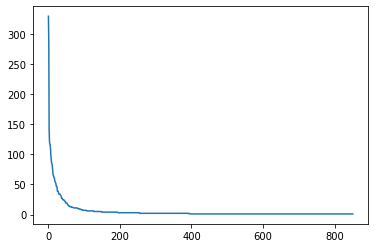

In [21]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

As the figure shown below and above, tokenized words in this corpora also follows a Zipf's law:

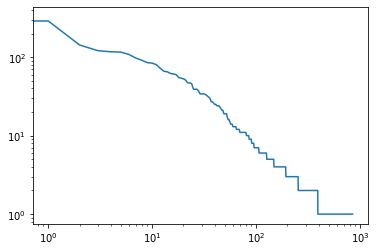

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Now using the nltk toolbox and transform our data into Text for other analysis:

* Concordance--here we show a few interesting examples:
  
  **Like**, the most frequently used word in this corpora, is used both for expressing self-opinion ("I like"), but more often for giving examples or as fillers.

In [24]:
import nltk
conTokens=word_tokenize(df_con['conversation_txt'].sum())
conText = nltk.Text(conTokens)

conIndex = nltk.text.ConcordanceIndex(conText) 
conIndex.print_concordance('like')

Displaying 25 of 320 matches:
 be abolished Um yeah Um I guess I 'd like to hear you talk about it I actually 
em here but for death penalty I think like if I think if someone committed to a 
really serious crime such as umm very like like murdering people and like not be
y serious crime such as umm very like like murdering people and like not being r
m very like like murdering people and like not being regretful about that and th
eing regretful about that and then um like continuously doing a lot of things th
continue to live in this society Yeah like definitely like I definitely see what
 in this society Yeah like definitely like I definitely see what you mean what t
m removed society because if you have like someone who 's like I do n't know lik
cause if you have like someone who 's like I do n't know like a terrorist who wh
ike someone who 's like I do n't know like a terrorist who who knows people indi
 people indiscriminately or something like that you know I think they should be

**I:**  typically used for stating personal opinions ("I guess", "I would like", "I think"):

In [72]:
conIndex.print_concordance('I')

Displaying 25 of 289 matches:
Okay so uh I guess they said we should start Yea we
hat this is a topic we disagreed on So I 'm guessing you said that it should n'
 it should n't be abolished Um yeah Um I guess I 'd like to hear you talk about
ld n't be abolished Um yeah Um I guess I 'd like to hear you talk about it I ac
ss I 'd like to hear you talk about it I actually did n't look much into the le
egal system here but for death penalty I think like if I think if someone commi
 but for death penalty I think like if I think if someone committed to a really
ociety and also the people around them I do n't think there is any reason why t
this society Yeah like definitely like I definitely see what you mean what the 
tely see what you mean what the reason I personally am against the death penalt
ainst the death penalty is n't because I do n't think some people should be fro
e if you have like someone who 's like I do n't know like a terrorist who who k
nately or something like that you know

**You:**  typically used when refering to the other's statement and opinion

In [75]:
conIndex.print_concordance('you')

Displaying 25 of 106 matches:
opic we disagreed on So I 'm guessing you said that it should n't be abolished 
 Um yeah Um I guess I 'd like to hear you talk about it I actually did n't look
definitely like I definitely see what you mean what the reason I personally am 
ld be from removed society because if you have like someone who 's like I do n'
discriminately or something like that you know I think they should be removed f
ved from society but at the same time you know in terms of like implementation 
t from like the pragmatic perspective you know like when you 're talking about 
gmatic perspective you know like when you 're talking about like like I 've don
 ton of like checks to make sure that you 're not executing the wrong person li
n spite of that every once in a while you know like people after their executio
on are exonerated by DNA evidence and you know you ca n't undo a death sentence
onerated by DNA evidence and you know you ca n't undo a death sentence but you 
 you ca n'

**Thank:** Sadly, only one people directly use 'thank' in this corpora

In [74]:
conIndex.print_concordance('thank')

Displaying 1 of 1 matches:
search that you mentioned Yeah so um thank you for asking And I 'd like to clar


In [202]:
conIndex.print_concordance('know')

Displaying 25 of 39 matches:
ave like someone who 's like I do n't know like a terrorist who who knows people
riminately or something like that you know I think they should be removed from s
from society but at the same time you know in terms of like implementation a lot
om like the pragmatic perspective you know like when you 're talking about like 
ite of that every once in a while you know like people after their execution are
re exonerated by DNA evidence and you know you ca n't undo a death sentence but 
 like from certain points of view you know a life sentence without parole might 
e Because with the death sentence you know you 're you 're dying like you do n't
and think about what you 've done you know With the life sentence you know you '
e you know With the life sentence you know you 're left to live the rest of your
eft to live the rest of your life you know thinking about what you did if that m
es sense But I guess that um I do n't know I just do n't think we should really 

Ploting a Disperson graph: while I am still a bit confused about what the meaning of X axis, but from the plot we could generally see that "like" appear most times, then "I", then "you"; occasionally, there are some "but" shows up, while less 'agree' shows up. It seems like that in the whole corpora, people still tend to focus more on expressing self-opinion, self-concentrated ("I"), with more negation ("but") than agreement ("agree"/"yeah").

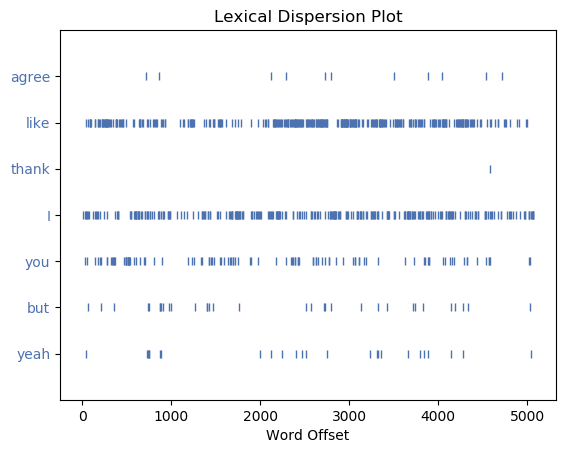

In [128]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
conText.dispersion_plot(['agree','like', 'thank', 'I','you','but','yeah']) #,'', 'Barber', 'Whitehouse'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [46]:
#tokenization on each conversation, on the dataframe
df_con['tokenized_text_all'] = df_con['conversation_txt'].apply(lambda x: word_tokenize(x))
df_con['tokenized_text_A'] = df_con['con_txt_A'].apply(lambda x: word_tokenize(x))
df_con['tokenized_text_B'] = df_con['con_txt_B'].apply(lambda x: word_tokenize(x))

In [47]:
df_con

,condition,conversation_txt,con_txt_A,con_txt_B,tokenized_text_all,tokenized_text_A,tokenized_text_B
0,NB,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Yea, we, should, start, Um, yeah, I, actually..."
1,TYB,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...,"[So, I, do, n't, really, I, think, I, said, ye...","[So, I, do, n't, really, I, think, I, said, ye...","[I, I, think, put, something, that, 's, below,..."
2,NB,"Uh, so, uh I-I actually uh read a lot about th...",Ok and so what does the law say? Does it say l...,"Uh, so, uh I-I actually uh read a lot about th...","[Uh, so, uh, I, I, actually, uh, read, a, lot,...","[Ok, and, so, what, does, the, law, say, Does,...","[Uh, so, uh, I, I, actually, uh, read, a, lot,..."
3,TYB,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...,"[Okay, so, you, What, 's, your, opinion, on, t...","[Okay, so, you, What, 's, your, opinion, on, t...","[I, strongly, disagree, with, this, I, think, ..."
4,TYB,"I'm good whenever you are Okay, let's start, y...","Okay, let's start, yea [laugh] Yeah, so um I t...","I'm good whenever you are So I guess like, wha...","[I, 'm, good, whenever, you, are, Okay, let, '...","[Okay, let, 's, start, yea, laugh, Yeah, so, u...","[I, 'm, good, whenever, you, are, So, I, guess..."
5,TYB,I just strongly believe in the right to um {{}...,I like what you said about like the right to. ...,I just strongly believe in the right to um {{}...,"[I, just, strongly, believe, in, the, right, t...","[I, like, what, you, said, about, like, the, r...","[I, just, strongly, believe, in, the, right, t..."
6,NB,"Yea, so so so. What do you--what do you person...","I think that the US, I answered that the US sh...","Yea, so so so. What do you--what do you person...","[Yea, so, so, so, What, do, you, what, do, you...","[I, think, that, the, US, I, answered, that, t...","[Yea, so, so, so, What, do, you, what, do, you..."
7,NB,"Okay, um, so I put a four. I like very minorly...",I disagree. I put I put a 10 for this. And I...,"Okay, um, so I put a four. I like very minorly...","[Okay, um, so, I, put, a, four, I, like, very,...","[I, disagree, I, put, I, put, a, 10, for, this...","[Okay, um, so, I, put, a, four, I, like, very,..."
8,TYB,"No. Yeah, that makes sense. And I, yeah, I app...","No. Yeah, that makes sense. And I, yeah, I app...",What do you know about herd immunity? Yeah.,"[No, Yeah, that, makes, sense, And, I, yeah, I...","[No, Yeah, that, makes, sense, And, I, yeah, I...","[What, do, you, know, about, herd, immunity, Y..."
9,TYB,"Oh, I think I strongly disagreed. Did you stro...","I agreed, yeah. Yeah. I definitely get what y...","Oh, I think I strongly disagreed. Did you stro...","[Oh, I, think, I, strongly, disagreed, Did, yo...","[I, agreed, yeah, Yeah, I, definitely, get, wh...","[Oh, I, think, I, strongly, disagreed, Did, yo..."


Count the tokenized words in each conversation, we could see that generaly there are at least 230 words, at the most there are around 600 words in this 3mins conversation: 

In [48]:
#count tokenized words in each conversation
df_con['word_counts'] = df_con['tokenized_text_all'].apply(lambda x: len(x))
df_con['word_counts']

0     592
1     393
2     348
3     550
4     230
5     654
6     510
7     374
8     229
9     507
10    418
11    271
Name: word_counts, dtype: int64

More interestingly, we could examine the ration of words expressed between Person A and Person B: from the table below, we could see that it is very imbalanced, sometimes Person A spoke quite a lot (in a case 27 times more words than B!); less often they speak less (5 out of 12 pairs) and it is irrelvant with their experiment condition.

In [80]:
#caculate the ratio of words expressed between Person A and Person B 
df_con['word_freq_A/B'] = (df_con['tokenized_text_A'].apply(lambda x: len(x)))/ (df_con['tokenized_text_B'].apply(lambda x: len(x)))
df_con[['word_freq_A/B','condition']]

,word_freq_A/B,condition
0,3.000000,NB
1,4.383562,TYB
2,0.462185,NB
3,0.708075,TYB
4,4.000000,TYB
5,0.672634,TYB
6,0.783217,NB
7,0.307692,NB
8,27.625000,TYB
9,2.448980,TYB


Count the words in the tokenized corpora, the result is similar as we have seen in the Exercise A:

In [50]:
countsDict = {}
for word in df_con['tokenized_text_all'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('like', 320),
 ('I', 290),
 ('that', 141),
 ('the', 121),
 ('a', 116),
 ('it', 113),
 ('you', 106),
 ('to', 96),
 ('of', 85),
 ('think', 84),
 ("n't", 80),
 ('do', 71),
 ("'s", 66),
 ('and', 64),
 ('in', 61),
 ('be', 55),
 ('is', 54),
 ('just', 53),
 ('they', 49),
 ('um', 49)]

Here we should select several stopwords. Since in this study we care both words of semantic meanings and those functional words, we arbitrarily select several stopwords, which are of high frequency but unrelated with our analysis:

In [81]:
#The stop list is then all words that occur before the first noun
#stop_words_freq = []
#for word, count in word_counts:
#    if word == 'Whitehouse':
#        break
#    else:
#        stop_words_freq.append(word)

stop_words_freq=['the','a','it','that','to','of','is',"n't",'do',"'s'",'be']

In [83]:
#function for normalization
def normalizeTokens(word_list, extra_stop=stop_words_freq):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

Normalize words for both the conversation text, and the texts for each Person and store them in the dataframe:

In [84]:
df_con['normalized_token_all'] = df_con['tokenized_text_all'].apply(lambda x: normalizeTokens(x))
df_con['normalized_token_A'] = df_con['tokenized_text_A'].apply(lambda x: normalizeTokens(x))
df_con['normalized_token_B'] = df_con['tokenized_text_B'].apply(lambda x: normalizeTokens(x))
df_con['normalized_tokens_allcount'] = df_con['normalized_token_all'].apply(lambda x: len(x))

df_con.head()

,condition,conversation_txt,con_txt_A,con_txt_B,tokenized_text_all,tokenized_text_A,tokenized_text_B,word_counts,normalized_token_all,normalized_token_A,normalized_token_B,normalized_tokens_allcount,word_freq_A/B
0,NB,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Yea, we, should, start, Um, yeah, I, actually...",592,"[okay, uh, guess, say, start, yea, start, uh, ...","[okay, uh, guess, say, start, uh, say, topic, ...","[yea, start, um, yeah, actually, look, legal, ...",239,3.000000
1,TYB,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...,"[So, I, do, n't, really, I, think, I, said, ye...","[So, I, do, n't, really, I, think, I, said, ye...","[I, I, think, put, something, that, 's, below,...",393,"[think, say, yes, think, oh, okay, uhhm, think...","[think, say, yes, oh, okay, uhhm, think, reaso...","[think, yeah, like, quote, bit, debate, mean, ...",144,4.383562
2,NB,"Uh, so, uh I-I actually uh read a lot about th...",Ok and so what does the law say? Does it say l...,"Uh, so, uh I-I actually uh read a lot about th...","[Uh, so, uh, I, I, actually, uh, read, a, lot,...","[Ok, and, so, what, does, the, law, say, Does,...","[Uh, so, uh, I, I, actually, uh, read, a, lot,...",348,"[uh, uh, actually, uh, read, lot, topic, uh, u...","[ok, law, like, study, ok, umm, thing, think, ...","[uh, uh, actually, uh, read, lot, topic, uh, u...",151,0.462185
3,TYB,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...,"[Okay, so, you, What, 's, your, opinion, on, t...","[Okay, so, you, What, 's, your, opinion, on, t...","[I, strongly, disagree, with, this, I, think, ...",550,"[okay, opinion, strongly, disagree, oh, wow--,...","[okay, opinion, oh, wow--, okay, mean, like, c...","[strongly, disagree, think, able, walk, red, l...",179,0.708075
4,TYB,"I'm good whenever you are Okay, let's start, y...","Okay, let's start, yea [laugh] Yeah, so um I t...","I'm good whenever you are So I guess like, wha...","[I, 'm, good, whenever, you, are, Okay, let, '...","[Okay, let, 's, start, yea, laugh, Yeah, so, u...","[I, 'm, good, whenever, you, are, So, I, guess...",230,"[m, good, okay, let, start, yea, laugh, guess,...","[okay, let, start, yea, laugh, yeah, um, think...","[m, good, guess, like, wha, wha, think, um, gu...",106,4.000000


Now that it is cleaned we start analyzing the dataset. We can start by finding frequency distributions for the dataset. Lets start looking at all the press releases together. The [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [86]:
#build the conditional frequency model
confdist = nltk.ConditionalFreqDist(((len(w), w) for w in df_con['normalized_token_all'].sum()))
print(confdist.N())

2022


In [87]:
#for TYB condition
confdist_TYB = nltk.ConditionalFreqDist(((len(w), w) for w in df_con[df_con['condition']=='TYB']['normalized_token_all'].sum()))
print(confdist_TYB.N())

1169


In [88]:
#for NB condition
confdist_NB = nltk.ConditionalFreqDist(((len(w), w) for w in df_con[df_con['condition']=='NB']['normalized_token_all'].sum()))
print(confdist_NB.N())

853


Plot distribution for both TYB and NB conditions, with word lengths of 5 and 8:

From the graphs below we could see that:
For words of length 5, for TYB condition, **"agree"** appears in the 4th place with about 10counts; while in the NB condition, **"agree"** appears only in the 15th position, with less 5 counts! 

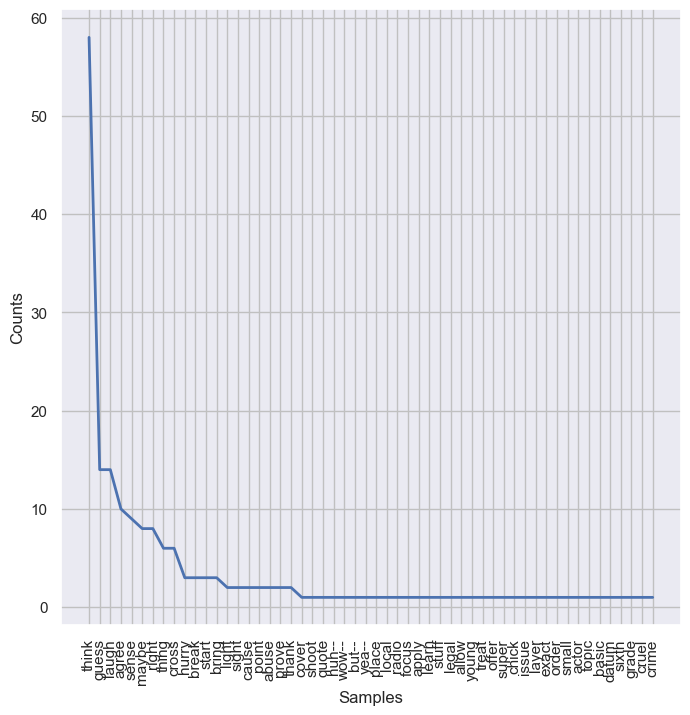

In [96]:
plt.subplots(figsize = (8,8))
confdist_TYB[5].plot();

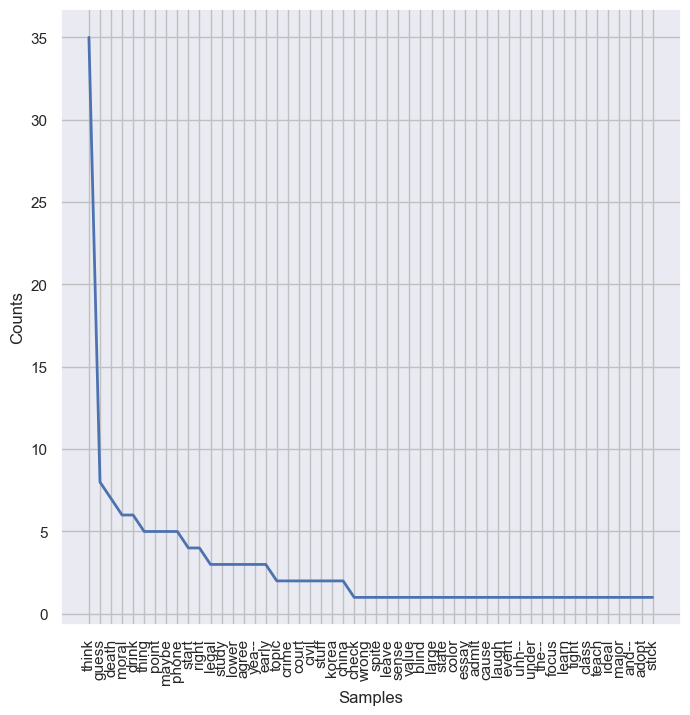

In [97]:
plt.subplots(figsize = (8,8))
confdist_NB[5].plot();

For words of length 8, for NB condition, **"disagree"** appears in the 2th place with 5counts; while in the TYB condition, **"disagree"** appears in the 6th position, with only 2 counts.

From these visualzation, we could probably tell the manipulation of **'Thank you because'** work. People in TYB condition tend to 'agree' more while 'disagree' less.

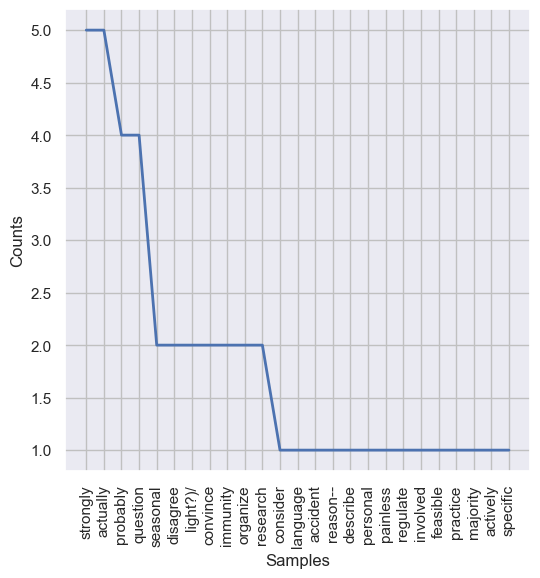

In [100]:
plt.subplots(figsize = (6,6))
confdist_TYB[8].plot();

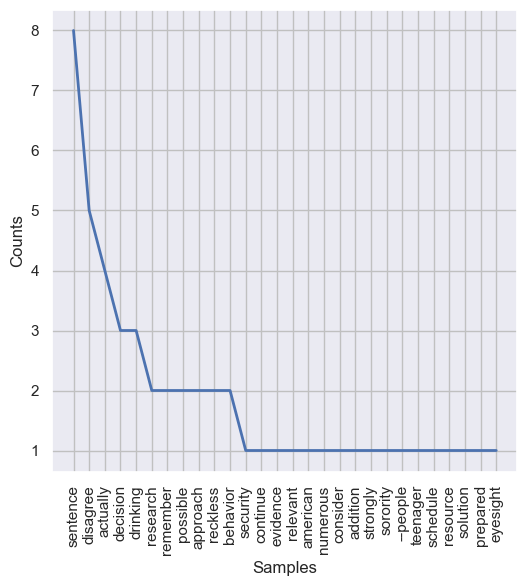

In [101]:
plt.subplots(figsize = (6,6))
confdist_NB[8].plot();

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [103]:
conpdist = nltk.ConditionalProbDist(confdist, nltk.ELEProbDist)

#print the most common 5 letter word
print(conpdist[5].max())

#And its probability
print(conpdist[5].prob(conpdist[5].max()))

think
0.24160206718346253


It is very interesting that in this corporus, with lenght of 5, the word **"think"** appear most, with a probabilty of 25%, which is reasonable since it is in a 'debate/discussion' situation to express opinions. For length of 2, the result is very interesting that, word **"um"** appear most. An important filling pause words, but might also work for affirmation. 

In [106]:
#print the most common 3 letter word
print(conpdist[2].max())

#And its probability
print(conpdist[2].prob(conpdist[3].max()))

um
0.0031446540880503146


Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). 

The method below works similarly to ```nltk.pos_text```, and can work with the conditional frequency distributions it provides.

In [107]:
#function for POS
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [111]:
#POS tagging our copora
df_con['normalized_tokens_POS'] = [spacy_pos(t) for t in df_con['conversation_txt']]

In [119]:
#build the frequency distribution
confdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df_con['normalized_tokens_POS'].sum())

In [120]:
confdist_POStoWord['JJ']

FreqDist({'moral': 6, 'right': 6, 'uhh': 6, 'same': 5, 'legal': 4, 'little': 4, 'other': 4, 'certain': 4, 'important': 4, 'able': 4, ...})

As we could see from the cells above, the most frequent adjectives are very interesting, 'moral','right' are very relevant to the topics.; while the most frequent nouns are kind of meaningless in this situation.

In [121]:
confdist_POStoWord['NN'].most_common(5)

[('lot', 24), ('something', 22), ('time', 12), ('sense', 10), ('way', 9)]

Most frequent verbs are also relatively of less meaning in this situation, which are just common words appear in a dialogue.

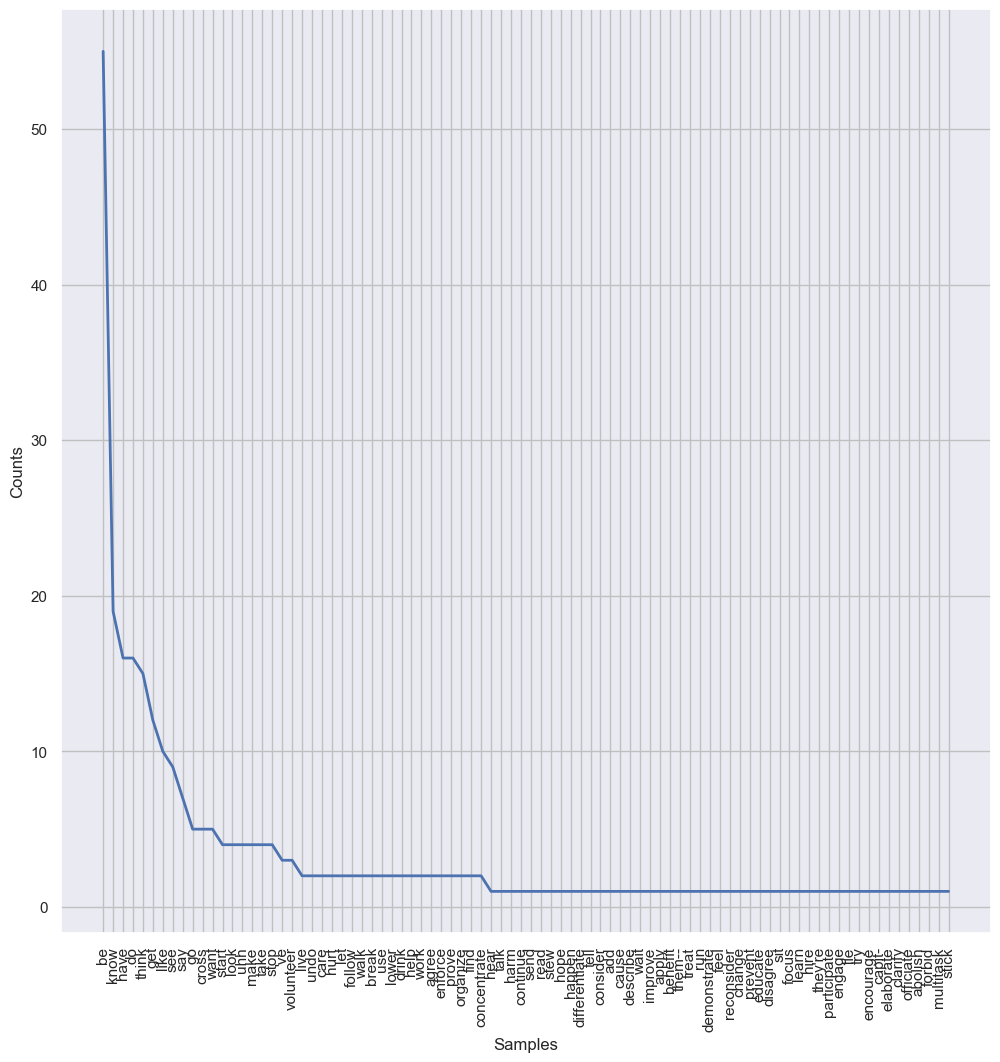

In [122]:
plt.subplots(figsize = (12,12))
confdist_POStoWord['VB'].plot()

In [124]:
#modeling probability
conpdist_POStoWord = nltk.ConditionalProbDist(confdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(conpdist_POStoWord['JJ'].max())

#And its probability
print(conpdist_POStoWord['JJ'].prob(conpdist_POStoWord['JJ'].max()))

moral
0.02490421455938697


From the probability modeling result, "moral", the most frequent adjective, only shows a probability of 2.5%, which is relatively low, but it is understandable, since the variety of adjectives.

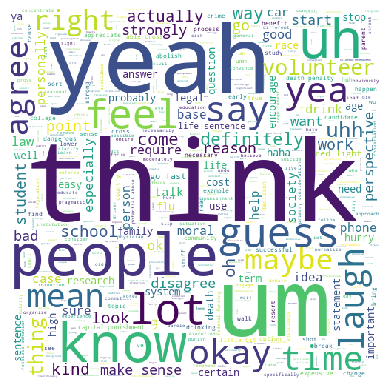

In [127]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_con['normalized_token_all'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("conversation corpora_word_cloud.pdf", format = 'pdf')

It is just a 'typical' word could for conversation about opinions, we could see a lot of filling words, "yeah", "um", words to show opinion "think", "guess", "know", "feel", "mean"; but nothing quite interesting for our main topic.

Then we compare the word cloud for each condition, TYB and NB：as we can see, the biggest difference is **"Yeah"** appears more in TYB condition while not in NB condition, which might be kind of sign of showing more "agreement" in TYB.

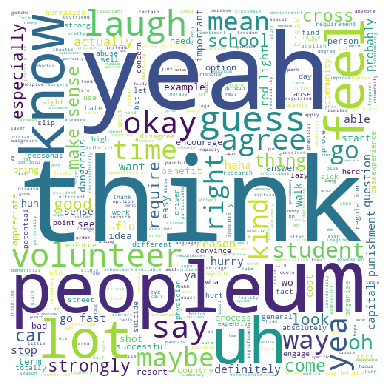

In [130]:
# word cloud for Thank you Because condition
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_con[df_con['condition']=='TYB']['normalized_token_all'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("conversation corpora_TYB_word_cloud.pdf", format = 'pdf')

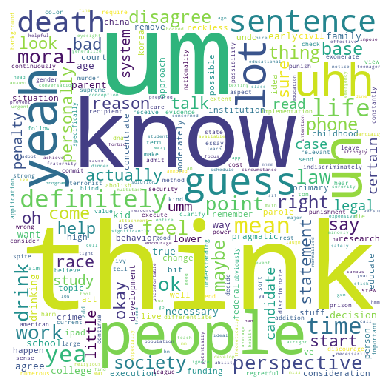

In [131]:
#word cloud for No Because condition
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_con[df_con['condition']=='NB']['normalized_token_all'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("conversation corpora_NB_word_cloud.pdf", format = 'pdf')

## POS Part of Speech

In [132]:
#function for sentence tokenization
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [137]:
df_con['sentences_all'] = df_con['conversation_txt'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
df_con['sentences_A'] = df_con['con_txt_A'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
df_con['sentences_B'] = df_con['con_txt_B'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [138]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

Pos tagging for each sentence in each conversation corpora:

In [140]:
df_con['POS_sents_all'] = df_con['sentences_all'].apply(lambda x: tag_sents_pos(x))
df_con['POS_sents_A'] = df_con['sentences_A'].apply(lambda x: tag_sents_pos(x))
df_con['POS_sents_B'] = df_con['sentences_B'].apply(lambda x: tag_sents_pos(x))

In [143]:
df_con['POS_sents_all']

0     [[(Okay, UH), (so, RB), (uh, UH), (I, PRP), (g...
1     [[(So, RB), (I, PRP), (do, VBP), (n't, RB), (r...
2     [[(Uh, UH), (so, RB), (uh, UH), (I, PRP), (-I,...
3     [[(Okay, UH)], [(so, IN), (you, PRP)], [(What,...
4     [[(I, PRP), (', ``), (m, NN), (good, JJ), (whe...
5     [[(I, PRP), (just, RB), (strongly, RB), (belie...
6     [[(Yea, RB)], [(so, RB)], [(so, RB), (so, RB),...
7     [[(Okay, UH), (um, UH), (so, RB), (I, PRP), (p...
8     [[(No, UH)], [(Yeah, UH), (that, DT), (makes, ...
9     [[(Oh, UH), (I, PRP), (think, VBP), (I, PRP), ...
10    [[(So, CC), (I, PRP), (', ''), (m, NN), (from,...
11    [[(You, PRP), (want, VBP), (to, TO), (go, VB),...
Name: POS_sents_all, dtype: object

Count the frequency of nouns/verbs: as shown previously, the nouns and verbs appeared most freqently are not very meaningful to our research question, but only common words in a conversation.

In [148]:
#count words of POS for noun
countTarget = 'NN'
targetCounts = {}
for entry in df_con['POS_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('lot', 24),
 ('something', 22),
 ('m', 14),
 ('time', 12),
 ('sense', 10),
 ('way', 9),
 ('someone', 8),
 ('laugh', 8),
 ('death', 7),
 ('life', 7),
 ('sentence', 6),
 ('thing', 6),
 ('punishment', 6),
 ('part', 6),
 ('law', 6),
 ('school', 6),
 ('society', 5),
 ('reason', 5),
 ('person', 5),
 ('perspective', 5)]

In [150]:
#count words of POS for verbs
countTarget = 'VB'
targetCounts = {}
for entry in df_con['POS_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('be', 31),
 ('know', 10),
 ('get', 10),
 ('think', 8),
 ('have', 8),
 ('do', 8),
 ('like', 5),
 ('make', 4),
 ('take', 4),
 ('say', 4),
 ('start', 3),
 ('go', 3),
 ('see', 3),
 ('undo', 2),
 ('hurt', 2),
 ('cross', 2),
 ('break', 2),
 ('volunteer', 2),
 ('laugh', 2),
 ('lower', 2)]

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?
    

Try to find the most frequent 'pronoun' before **'like'**, the most frequent word in this corpos. As shown below, it used much more for filling-'it'/'they'/'them', than expressing self-attitude, 'I' like.

In [151]:
NTarget = 'PRP'
Word = 'like'
NResults = set()
for entry in df_con['POS_sents_all']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'it', 'you', 'they', 'them', 'I'}


Not suprisingly, the most common verb following 'I' is 'think' to express opinions. **"I think'**

In [156]:
# I verb
NTarget = 'VB'
Word = 'I'
NResults = set()
for entry in df_con['POS_sents_all']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (ent1,kind2)==(Word,NTarget):
                NResults.add(ent2)
            else:
                continue

print(NResults)     

{'think'}


Very interesting, even for you, the most common verb is also 'think', then 'want'/'do'/'talk', which indicates a level of understanding. **"You think/want"**. We could further see that, in TYB condiiton, there are more various verbs (even more concrete, like, 'elaborate', 'know') following 'you', indicating a high possibility/degree of expressing understanding of what the other people have talked about.

In [158]:
#you verb
NTarget = 'VB'
Word = 'you'
NResults = set()
for entry in df_con['POS_sents_all']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (ent1.lower(),kind2)==(Word,NTarget):
                NResults.add(ent2)
            else:
                continue

print(NResults)     

{'think', 'want', 'do', 'talk', 'cross', 'say', 'make', 'prove', 'elaborate', 'know'}


In [160]:
#you verb, on TYB condition
NTarget = 'VB'
Word = 'you'
NResults = set()
for entry in df_con[df_con['condition']=='TYB']['POS_sents_all']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (ent1.lower(),kind2)==(Word,NTarget):
                NResults.add(ent2)
            else:
                continue

print(NResults)     

{'think', 'want', 'do', 'cross', 'make', 'prove', 'elaborate', 'know'}


In [161]:
#you verb, on NB condition 
NTarget = 'VB'
Word = 'you'
NResults = set()
for entry in df_con[df_con['condition']=='NB']['POS_sents_all']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (ent1.lower(),kind2)==(Word,NTarget):
                NResults.add(ent2)
            else:
                continue

print(NResults)     

{'say', 'think', 'want', 'talk'}


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

As illustrated above, we might want to find significant bigrams (two-word phrases), trigrams (three-word phrases), n-grams (*n*-word phrases) or skip-grams (noncontinguous 'phrases' with skip-length *n*). 

We will begin with the [`nltk.collocations.BigramCollocationFinder`](http://www.nltk.org/api/nltk.html?highlight=bigramcollocationfinder#nltk.collocations.BigramCollocationFinder) class, which can be given raw lists of strings with the `from_words()` method. By default it only looks at continuous bigrams but there is an option (`window_size`) to allow skip-grams.

In [166]:
conBigrams = nltk.collocations.BigramCollocationFinder.from_words(df_con['normalized_token_all'].sum())
print("There are {} bigrams in the finder".format(conBigrams.N))

There are 2022 bigrams in the finder


In [167]:
def bigramScoring(count, wordsTuple, total):
    return count

print(conBigrams.nbest(bigramScoring, 10))

[('like', 'like'), ('think', 'like'), ('feel', 'like'), ('um', 'like'), ('like', 'know'), ('people', 'like'), ('like', 'people'), ('know', 'like'), ('um', 'think'), ('yeah', 'like')]


It is very interesting, almost all the most frequent 'bigram' are related with 'like' and its filling functions.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that a t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics. 

In [170]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
conBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('make', 'sense'), 81.08150402077592),
 (('capital', 'punishment'), 50.158296107603505),
 (('go', 'fast'), 37.5240482253565),
 (('feel', 'like'), 37.32156454495348),
 (('little', 'bit'), 36.078556190375764),
 (('life', 'sentence'), 35.631645138219106),
 (('death', 'penalty'), 35.51421395815215),
 (('able', 'cross'), 32.26145481582172),
 (('childhood', 'development'), 31.672801984153665),
 (('federal', 'funding'), 31.672801984153665),
 (('herd', 'immunity'), 31.672801984153665),
 (('mm', 'hm'), 31.672801984153665),
 (('potential', 'abuse'), 31.672801984153665),
 (('primary', 'consideration'), 31.672801984153665),
 (('reckless', 'behavior'), 31.672801984153665),
 (('high', 'school'), 29.124945099824544),
 (('commit', 'crime'), 27.853716974384785),
 (('moral', 'perspective'), 27.208355512747122),
 (('red', 'light'), 26.127624539674102),
 (('red', 'light?)/'), 26.127624539674102),
 (('death', 'sentence'), 24.949058208025246),
 (('remove', 'society'), 24.9426853140611),
 (('expensive', 'p

The digram resutls are more reasonable/meaningful after statistical analayis. Try with student_t measures below: the results are pretty similar, with very small difference in the score/order of the digrams.

Some of the bi-grams are more related with the moral topic, like 'capital punishment'.'childhood development','death sentence'; some are more related with expressing opinions/affirmation, like **'make sense','feel like', 'hm-um'**-- these bi-grams have extra meanings in expressing and communicating ideas. and These results are very interesting and informative that we could count those bigram as separate but significant linguistic feature for counting **'affirmation'** in the following analysis

In [303]:
#try with student_t measures
bigram_measures = nltk.collocations.BigramAssocMeasures()
conBigrams.score_ngrams(bigram_measures.student_t)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('feel', 'like'), 3.143175074183976),
 (('make', 'sense'), 2.632666487567733),
 (('capital', 'punishment'), 1.9940652818991098),
 (('lot', 'people'), 1.9865838352030771),
 (('go', 'fast'), 1.9851632047477745),
 (('life', 'sentence'), 1.9841740850642928),
 (('yeah', 'make'), 1.8961424332344214),
 (('uh', 'uh'), 1.8821897614760839),
 (('yeah', 'think'), 1.8527456610911617),
 (('yeah', 'agree'), 1.8071216617210681),
 (('um', 'think'), 1.7714388724532422),
 (('little', 'bit'), 1.727482259444726),
 (('death', 'penalty'), 1.7260545881559288),
 (('able', 'cross'), 1.7251979853826505),
 (('high', 'school'), 1.721771574289537),
 (('moral', 'perspective'), 1.72005836874298),
 (('death', 'sentence'), 1.7160608891343478),
 (('yeah', 'um'), 1.6620672240843326),
 (('lot', 'time'), 1.6292584747754721),
 (('think', 'important'), 1.6258320636823587),
 (('say', 'like'), 1.597096170816438),
 (('base', 'like'), 1.5919881305637982),
 (('like', 'know'), 1.5795755139253265),
 (('laugh', 'know'), 1.56073025

For tri-grams: more filling words phrases show up in tri-grams. The tri-grams below are less 'stable'(appear randomnly together) and do not have extra semantic meanings in them, which is not informative and useful for future analysis.

In [173]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
conTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df_con['normalized_token_all'].sum())
conTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('yeah', 'make', 'sense'), 1.9994863621821684),
 (('think', 'like', 'people'), 1.8235984291487994),
 (('yeah', 'um', 'think'), 1.6808325705316096),
 (('um', 'like', 'think'), 1.450350503863904),
 (('absolutely', 'car', 'sight'), 1.4142094115527055),
 (('lot', 'potential', 'abuse'), 1.4141969590915378),
 (('moderately', 'agree', 'statement'), 1.4141955754847413),
 (('know', 'reckless', 'behavior'), 1.4141858902371665),
 (('make', 'sense', 'mean'), 1.4140440705405324),
 (('capital', 'punishment', 'um'), 1.4139437590477912),
 (('lot', 'time', 'base'), 1.4139022508438983),
 (('death', 'penalty', 'think'), 1.4138757893639167),
 (('know', 'life', 'sentence'), 1.4137708081982376),
 (('make', 'sense', 'yeah'), 1.4134871688049695),
 (('like', 'high', 'school'), 1.4121589062803974),
 (('like', 'moral', 'perspective'), 1.4118164635982813),
 (('moral', 'perspective', 'like'), 1.4118164635982813),
 (('like', 'go', 'fast'), 1.4107891355519324),
 (('student', 'like', 'actually'), 1.4101042501877001

For N gram, also filling words pairs dominant, not very meaningful and interesting for our research focus.

In [176]:
Ngrams = nltk.ngrams(df_con['normalized_token_all'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('like', 'like', 'know', 'like'): 2, ('yeah', 'make', 'sense', 'yeah'): 2, ('lot', 'time', 'base', 'like'): 2, ('like', 'think', 'like', 'like'): 2, ('yeah', 'make', 'sense', 'mean'): 2, ('um', 'like', 'think', 'like'): 2, ('like', 'like', 'like', 'like'): 2, ('like', 'know', 'lot', 'people'): 2, ('think', 'like', 'people', 'like'): 2}


Try with Gensim:

In [177]:
import gensim

In [178]:
bigram = gensim.models.Phrases(df_con['normalized_token_all'])

In [179]:
texts = [bigram[line] for line in df_con['normalized_token_all']]

In [181]:
texts[1]

['think',
 'say',
 'yes',
 'think',
 'oh',
 'okay',
 'uhhm',
 'think',
 'reason',
 'think',
 'like',
 'long',
 'medical',
 'condition',
 'permit',
 'mean',
 'like',
 'like',
 'safe',
 'like',
 'know',
 'wo',
 'hurt',
 'assume',
 'guess',
 'like',
 'cost',
 'cover',
 'um',
 'uh',
 'like',
 'net',
 'benefit',
 'thing',
 'um',
 'flu',
 'shoot',
 'people',
 'sick',
 'yeah',
 'know',
 'totally',
 'agree',
 'practical',
 'thing',
 'definitely',
 'time',
 'like',
 'lazy',
 'yeah',
 'maybe',
 'okay',
 'like',
 'reality',
 'yeah',
 'totally',
 'feel',
 'lazy',
 'yeah',
 'yeah',
 'make_sense',
 'yeah',
 'like',
 'quote',
 'bit',
 'debate',
 'mean',
 'definition',
 'laugh',
 'uh',
 'huh',
 'sort',
 'strong',
 'word--',
 'like',
 'cost',
 'm',
 'think',
 'like',
 'fact',
 'like',
 'time',
 'maybe',
 'shot',
 'painful',
 'like',
 'maybe',
 'cost',
 'consider',
 'like',
 'get',
 'flu',
 'shot',
 'think',
 'so--',
 'uh',
 'huh--',
 '--strongly',
 'agree',
 'yeah',
 'know',
 'maybe',
 'good',
 'langua

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

# Named-Entity Recognition

Named Entity Recognition (NER) is also a classification task, which identifies named objects. 
Like every other part of the pipeline, spaCy also tags words with their tagged entity (https://spacy.io/api/entityrecognizer). You can see the full capacity of what spaCy does by checking out: https://spacy.io/usage/linguistic-features.

For training the identification of such entities, spaCy uses a deep learning model.

In [187]:
#find ent in sentences
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [184]:
df_con['classified_sents_all'] = df_con['sentences_all'].apply(lambda x: tag_sents_ner(x))
df_con['classified_sents_A'] = df_con['sentences_A'].apply(lambda x: tag_sents_ner(x))
df_con['classified_sents_B'] = df_con['sentences_B'].apply(lambda x: tag_sents_ner(x))

In [186]:
df_con['classified_sents_all']

0     [[], [], [], [], [], [], [], [], [], [], [], [...
1     [[], [], [], [], [(five, CARDINAL)], [(Three o...
2     [[(the Supreme Court, ORG)], [], [], [], [], [...
3     [[], [], [], [], [], [], [], [], [], [], [], [...
4     [[], [], [], [], [], [], [], [], [], [], [], [...
5     [[], [], [], [], [], [], [], [], [], [], [], [...
6     [[], [], [], [], [(US, GPE), (US, GPE)], [], [...
7     [[(four, CARDINAL)], [], [], [], [], [], [], [...
8     [[], [], [], [], [], [], [], [], [], [], [], [...
9     [[], [], [], [], [], [], [], [], [], [(Hyde Pa...
10    [[], [], [], [], [], [], [], [], [], [], [(Yea...
11    [[(first, ORDINAL)], [], [], [], [], [], [], [...
Name: classified_sents_all, dtype: object

Find the most common entities: not very meaningful, but just country names

In [188]:
entityCounts = {}
for entry in df_con['classified_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('US', 4),
 ('Yea', 4),
 ('first', 3),
 ('one', 3),
 ('19', 3),
 ('10', 2),
 ('80', 2),
 ('Korea', 2),
 ('China', 2),
 ('Mm', 2)]

We could also list the most common "non-objects". Apparently, there are so few organizations in this corpous. So I also count the numbers of cases in each NER category.

In [193]:
nonObjCounts = {}
kindCount={}
for entry in df_con['classified_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
            if kind in kindCount:
                kindCount[kind]+=1
            else:
                kindCount[kind]=1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('US', 4),
 ('Yea', 4),
 ('first', 3),
 ('one', 3),
 ('19', 3),
 ('10', 2),
 ('80', 2),
 ('Korea', 2),
 ('China', 2),
 ('Mm', 2)]

As shown below, the most frequent NER category in this corpora is cardinal (numbers,19), then Person (12) and GPE (country,9).

In [194]:
kindCount

{'GPE': 9,
 'CARDINAL': 19,
 'QUANTITY': 1,
 'WORK_OF_ART': 1,
 'LAW': 2,
 'NORP': 1,
 'ORDINAL': 4,
 'PERSON': 12,
 'DATE': 2,
 'LOC': 1}

There are quite a few organizations in this corpus, also it is not very accurate, for example, "PhDs" is apparently not an organization.

In [190]:
OrgCounts = {}
for entry in df_con['classified_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

the Supreme Court
PhDs
it--


The cases of GPE/country: 

In [195]:
OrgCounts = {}
for entry in df_con['classified_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'GPE':
                print(ent)

US
Chicago
US
US
Korea
Korea
US
China
China


The cases of Person: 

In [196]:
OrgCounts = {}
for entry in df_con['classified_sents_all']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'PERSON':
                print(ent)

Yea
Yea yea
yea Gotcha
yea
Yea
Yea
Walgreens
Mm
Huhh
Haha
Yea
Mm


Calculate the **Precision, Recall and F1-score** for the PERSON NER category in the 12 corpora:
* Precision: since none of the PERSON entities was correctly predicted, the precision is 0
* Recall: since non accurate sample has been found, the recall is also 0--then there is no need to calculate F1-score then

## Dependency parsing and graph representations

Dependency parsing was developed to robustly capture linguistic dependencies from text. The complex tags associated with these parses are detailed [here]('http://universaldependencies.org/u/overview/syntax.html'). When parsing with the dependency parser, we will work directly from the untokenized text. Note that no *processing* takes place before parsing sentences--we do not remove so-called stop words or anything that plays a syntactic role in the sentence, although anaphora resolution and related normalization may be performed before or after parsing to enhance the value of information extraction. 

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [198]:
from spacy import displacy
from spacy.symbols import nsubj, VERB

## Sentence Complexity

I try to analyze sentences (or subset) of the corpora, to see how deep the phrase structure they have.

* First try with the simplest ones, one sentence from Person A in pair1:

In [251]:
text0 = ' '.join(df_con['sentences_A'][0][0])
doc0 = nlp(text0)

A very short sentence:

In [252]:
text0

'Okay so uh I guess they said we should start'

Parse the sentence of each token:

In [239]:
for token in doc0:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Okay intj guess VERB []
so advmod guess VERB []
uh intj guess VERB []
I nsubj guess VERB []
guess ROOT guess VERB [Okay, so, uh, I, said]
they nsubj said VERB []
said ccomp guess VERB [they, start]
we nsubj start VERB []
should aux start VERB []
start ccomp said VERB [we, should]


Another way we could do check the tree structure is to find the root of it, and then calculate the numbers of tokens left/right to it:

In [243]:
root = [token for token in doc0 if token.head == token][0]
print(root)
print([token.text for token in root.lefts]) 
print([token.text for token in root.rights])  
print(root.n_lefts) 
print(root.n_rights)  

guess
['Okay', 'so', 'uh', 'I']
['said']
4
1


In [260]:
for chunk in doc0.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

I I nsubj guess
they they nsubj said
we we nsubj start


Or directly showing the tree structure:

In [240]:
displacy.render(doc0, style='dep')

Try with another longer sentence:

In [249]:
text1 = ' '.join(df_con['sentences_A'][0][5])
doc1 = nlp(text1)

In [253]:
text1

"Yeah like definitely like I definitely see what you mean what the reason I personally am against the death penalty is n't because I do n't think some people should be from removed society because if you have like someone who 's like I do n't know like a terrorist who who knows people indiscriminately or something like that you know I think they should be removed from society but at the same time you know in terms of like implementation a lot of the time"

Parse the sentence of each token: compared with the sentence before, it apparently is much longer and more complex.

In [254]:
for token in doc1:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Yeah intj see VERB []
like intj see VERB [definitely]
definitely intj like INTJ []
like intj see VERB []
I nsubj see VERB []
definitely advmod see VERB []
see ROOT see VERB [Yeah, like, like, I, definitely, mean]
what dobj mean VERB []
you nsubj mean VERB []
mean ccomp see VERB [what, you, is]
what attr is AUX []
the det reason NOUN []
reason nsubj is AUX [the, am]
I nsubj am AUX []
personally advmod am AUX []
am relcl reason NOUN [I, personally, against]
against prep am AUX [penalty]
the det penalty NOUN []
death compound penalty NOUN []
penalty pobj against ADP [the, death]
is ccomp mean VERB [what, reason, n't, think]
n't neg is AUX []
because mark think VERB []
I nsubj think VERB []
do aux think VERB []
n't neg think VERB []
think advcl is AUX [because, I, do, n't, be, because]
some det people NOUN []
people nsubj be AUX [some]
should aux be AUX []
be ccomp think VERB [people, should, from]
from prep be AUX [society]
removed amod society NOUN []
society pobj from ADP [removed]
beca

Then examine the tree structure around the root: a slight different, only a little bit more tokens in the left side. The reasons might be there are multiple nested noun-chuncks in the rest of data structure, which could not be extracted from the root itself.

In [255]:
root = [token for token in doc1 if token.head == token][0]
print(root)
print([token.text for token in root.lefts])  
print([token.text for token in root.rights])  
print(root.n_lefts)  
print(root.n_rights)  

see
['Yeah', 'like', 'like', 'I', 'definitely']
['mean']
5
1


For the second sentence, it has more noun-chunks as well:

In [258]:
for chunk in doc1.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

I I nsubj see
what what dobj mean
you you nsubj mean
what what attr is
the reason reason nsubj is
I I nsubj am
the death penalty penalty pobj against
I I nsubj think
some people people nsubj be
removed society society pobj from
you you nsubj have
someone someone pobj like
who who nsubj 's
I I nsubj know
a terrorist terrorist pobj like
who who pobj like
who who nsubj knows
people people dobj knows
you you nsubj know
I I nsubj think
they they nsubjpass removed
society society pobj from
the same time time pobj at
you you nsubj know
terms terms pobj in
implementation implementation pobj like
a lot lot pobj at
the time time pobj of


The tree graph is also more complicated, indicating every level of subj-verb pair/noun chuncks:

In [256]:
displacy.render(doc1, style='dep')

## Information Extraction

By using dependency parsing, I try to extract information (verbs/subjs/objs) around those most frequent and significant words in the corpora: 
1. subjs and objs around **'like'**, the most frequent word

In [263]:
con_like = ([],[])
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    #con_like[index] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is 'like'
        if chunk.root.head.text == 'like':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                con_like[0].append(subject)
            if object_ is not 0:
                con_like[1].append(object_)

From the results below we could see that although there are a lot of 'like' in the corpora,**'like' used as a clear 'S+V+O' format is not that much**, usually linked with 'I, people, you'. Even for these subjs, we could not also exclude the situations when 'like' is serving as a filling word. It is very hard to extract from the corpora.

In [266]:
print('like')
print('subj:',con_like[0])
print('obj:',con_like[1])

like
subj: ['I', 'people', 'I', 'they', 'they', 'I', 'I', 'you', 'you', 'you', 'They', 'I', 'I', 'I', 'it']
obj: ['lot', 'me']


2. Try with **'think'**, another most frequent verb, as well, to extract subjects and objects around it.

In [288]:
con_think = ([],[])
con_think_TYB=([],[])
con_think_NB=([],[])
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    #con_like[index] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is 'like'
        if chunk.root.head.text == 'think':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                con_think[0].append(subject)
                if row['condition']=='TYB':
                    con_think_TYB[0].append(subject)
                if row['condition']=='NB':
                    con_think_NB[0].append(subject)
            if object_ is not 0:
                con_think[1].append(object_)
                if row['condition']=='TYB':
                    con_think_TYB[1].append(object_)
                if row['condition']=='NB':
                    con_think_NB[1].append(object_)

In [271]:
print('think')
print('subj:',con_think[0])
print('obj:',con_think[1])

think
subj: ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'You', 'I', 'I', 'you', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'you', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'you', 'I', 'I', 'we', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
obj: ['it']


As we could see above, there more ocassions for 'think' than 'like' which in a clear 'S+V+O' format. and For think, not suprisingly, 'I' appeared the most time, then 'you' and 'we'. Show the set of subjects as below:

In [270]:
print('think')
print('subj:',set(con_think[0]))
print('obj:',set(con_think[1]))

think
subj: {'You', 'I', 'we', 'you'}
obj: {'it'}


It is even more interesting to view the difference between conditions, for subjects around 'think':
* It is very interesting that in TYB condition, there are more 'I' compared with NB, which is kind of contradictory with our prediction.

In [289]:
print('think-TYB')
print('subj:',con_think_TYB[0])
print('obj:',con_think_TYB[1])

think-TYB
subj: ['I', 'I', 'I', 'You', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'you', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
obj: ['it']


In [290]:
print('think-NB')
print('subj:',con_think_NB[0])
print('obj:',con_think_NB[1])

think-NB
subj: ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'you', 'you', 'I', 'I', 'we', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
obj: []


3. Then, for another most frequent Noun=**People**, I extract the verb *before it or after it*: 

In [278]:
#verb after people 
con_pp_verb=[]
con_pp_verb_TYB=[]
con_pp_verb_NB=[]
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    #con_like[index] = ([], [])
    doc = nlp(text)
    for token in doc:
        if token.text.lower()=='people' and token.dep==nsubj:
            if token.head.pos==VERB:
                con_pp_verb.append(token.head.text)
                if row['condition']=='TYB':
                    con_pp_verb_TYB.append(token.head.text)
                if row['condition']=='NB':
                    con_pp_verb_NB.append(token.head.text) 

set(con_pp_verb)

{'adopted',
 'came',
 'concentrate',
 'drink',
 'go',
 'going',
 'like',
 'see',
 'should',
 'suffering',
 'volunteer'}

* From the results above and below, we could see the different verb used for people, which is very interesting. All related with the topic poeple are arguing about, while not very relevant to our study. 

In [281]:
#verb before people 
con_pp_verb2=[]
con_pp_verb2_TYB=[]
con_pp_verb2_NB=[]
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    #con_like[index] = ([], [])
    doc = nlp(text)
    for token in doc:
        if token.text.lower()=='people' and token.dep_=='dobj':
            if token.head.pos==VERB:
                con_pp_verb2.append(token.head.text)
                if row['condition']=='TYB':
                    con_pp_verb2_TYB.append(token.head.text)
                if row['condition']=='NB':
                    con_pp_verb2_NB.append(token.head.text) 

set(con_pp_verb2)

{'bringing', 'encourage', 'ignoring', 'knows', 'murdering'}

4. Another pair might be interesting to look at is the verb after **'I'** and **'You'**:

In [296]:
#verb after 'I'
con_I_verb=[]
con_I_verb_TYB=[]
con_I_verb_NB=[]
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    #con_like[index] = ([], [])
    doc = nlp(text)
    for token in doc:
        if token.text=='I' and token.dep==nsubj:
            if token.head.pos==VERB:
                con_I_verb.append(token.head.text)
                if row['condition']=='TYB':
                    con_I_verb_TYB.append(token.head.text)
                if row['condition']=='NB':
                    con_I_verb_NB.append(token.head.text) 

con_I_verb_set=list(set(con_I_verb))
print(len(con_I_verb_set))
con_I_verb_set

51


['think',
 'read',
 'lie',
 'see',
 'tend',
 'answered',
 'looking',
 'talking',
 'said',
 'disagreed',
 'done',
 'know',
 'answering',
 'came',
 'remember',
 'got',
 'say',
 'should',
 'like',
 'assuming',
 'get',
 'put',
 'believe',
 'noticed',
 'thought',
 'looked',
 'went',
 'disagree',
 'appreciate',
 'hate',
 'used',
 'found',
 'look',
 'give',
 'guess',
 'describe',
 'well',
 'volunteered',
 'care',
 'felt',
 'agree',
 'mean',
 'confused',
 'add',
 'want',
 'agreed',
 'coming',
 'seen',
 'imagining',
 'thinking',
 'feel']

Compared between TYB and NB conditions, still there are more diverse words used in TYB after 'I', compared with NB, which is kind of contradict with our prediction at the first look. But another interesting interpretations might be that: after showing gratitude and understanding, people are more motivated to share their opinions mutually. Moreover, 'I' could also be used to express feelings and understandings towards the others as well (for example, "get","see",are more towards the other people). Hence,it is reasonable to see more diverse verbs and generally more verbs related with 'I' in TYB conditions.

In [297]:
# verbs for I in TYB condition
print(len(set(con_I_verb_TYB)))
set(con_I_verb_TYB)

40


{'agree',
 'agreed',
 'answered',
 'answering',
 'appreciate',
 'assuming',
 'believe',
 'care',
 'coming',
 'confused',
 'describe',
 'disagree',
 'disagreed',
 'done',
 'feel',
 'get',
 'give',
 'guess',
 'hate',
 'imagining',
 'know',
 'lie',
 'like',
 'looked',
 'looking',
 'mean',
 'put',
 'said',
 'say',
 'see',
 'seen',
 'should',
 'talking',
 'tend',
 'think',
 'thinking',
 'thought',
 'used',
 'volunteered',
 'want'}

In [299]:
# verb for I in NB condition
print(len(set(con_I_verb_NB)))
set(con_I_verb_NB)

27


{'add',
 'agree',
 'agreed',
 'answered',
 'believe',
 'came',
 'disagree',
 'done',
 'feel',
 'felt',
 'found',
 'got',
 'guess',
 'know',
 'like',
 'look',
 'mean',
 'noticed',
 'put',
 'read',
 'remember',
 'see',
 'think',
 'thinking',
 'thought',
 'well',
 'went'}

5. Extract verbs after **'you'**: while generally there are less verbs associated with 'you' (35 unique verbs),then 'I'(51 unique verbs), 'you' appeared more often and more diverse in TYB condition, than NB condition, which supports our hypothesis. People tend to understand and care about the others' opinions more, when are triggered to express gratitude and understanding.

In [300]:
con_you_verb=[]
con_you_verb_TYB=[]
con_you_verb_NB=[]
for index, row in df_con.iterrows():
    text = ' '.join(row['tokenized_text_all'])
    doc = nlp(text)
    for token in doc:
        if token.text.lower()=='you' and token.dep==nsubj:
            if token.head.pos==VERB:
                con_you_verb.append(token.head.text)
                if row['condition']=='TYB':
                    con_you_verb_TYB.append(token.head.text)
                if row['condition']=='NB':
                    con_you_verb_NB.append(token.head.text) 

con_you_verb_set=list(set(con_you_verb))
print(len(con_you_verb_set))
con_you_verb_set

35


['think',
 'crossing',
 'mentioned',
 'bring',
 'cross',
 'see',
 'lower',
 'go',
 'tell',
 'make',
 'talking',
 'gon',
 'said',
 'know',
 'wait',
 'say',
 'get',
 'like',
 'saying',
 'executing',
 'prove',
 'missing',
 'dying',
 'talk',
 'need',
 'decided',
 'undo',
 'elaborate',
 'agree',
 'mean',
 'convince',
 'want',
 'coming',
 'walk',
 'reconsider']

In [301]:
# verbs for You in TYB condition
print(len(set(con_you_verb_TYB)))
set(con_you_verb_TYB)

23


{'agree',
 'bring',
 'coming',
 'convince',
 'cross',
 'crossing',
 'elaborate',
 'get',
 'go',
 'know',
 'like',
 'make',
 'mentioned',
 'need',
 'prove',
 'reconsider',
 'said',
 'saying',
 'see',
 'think',
 'wait',
 'walk',
 'want'}

In [302]:
# verb for You in NB condition
print(len(set(con_you_verb_NB)))
set(con_you_verb_NB)

16


{'decided',
 'dying',
 'executing',
 'gon',
 'know',
 'lower',
 'mean',
 'missing',
 'said',
 'say',
 'talk',
 'talking',
 'tell',
 'think',
 'undo',
 'want'}

# Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Kullback-Leibler and $x^2$ divergences ###

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.  

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

This is also noncommutative, and the code can be drawn directly from scipy.

### Kolmogorov-Smirnov ###

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.

### Wasserstein Distance ###

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.

### Computing ###

To do this we will need to create the arrays, lets compare the Whitehouse releases with the Kennedy releases. First we have to download them and load them into a DataFrame.

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

Organize corpora for calculating distances: extract the 12 conversations separately.

In [309]:
corpora = []
for index, row in df_con.iterrows():
    if len(corpora) > 11:
        break
    corpora.append(row['tokenized_text_all'])

In [310]:
len(corpora)

12

Name each conversation with a pair id: 

In [319]:
fileids=[str(i+1) for i in list(range(12))]

Separate stopwords and non-stop words in different corpora:

In [324]:
#stopwords and non-stop words
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

In [326]:
len(corpora_nons)

12

Functions to calculate divergence and distances: also fullfill the **Jensen-shannonn distance** calculation function based on kl_divergence function

In [311]:
def js_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    M=(p+q)/2
    D_js=0.5*scipy.stats.entropy(p, M)+0.5*scipy.stats.entropy(q, M)
    return D_js

def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "JS":
        return js_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Calculate the KL distance between each pair of conversation and show the heatmap: we could see that the distance between each two conversation is very close.

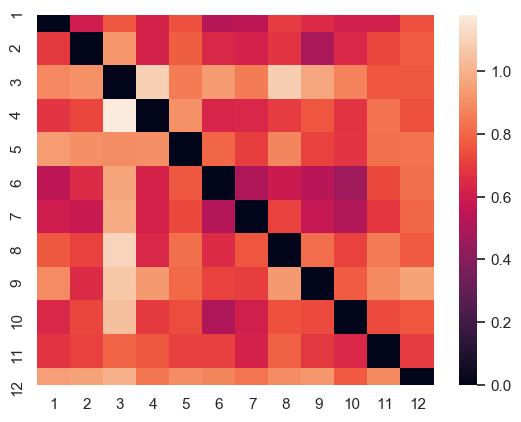

In [320]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Visualize the results in MDS graph: 
* we could see that most conversations clustered together. Conversation 3, 4, 12 are at most extreme places, which generally have more or less words in conversaton. Conversation 5,9 are also relatively more far away, while the reason is not very clear (not by length/condition).

In [337]:
df_con[['condition','word_counts']]

,condition,word_counts
0,NB,592
1,TYB,393
2,NB,348
3,TYB,550
4,TYB,230
5,TYB,654
6,NB,510
7,NB,374
8,TYB,229
9,TYB,507


C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


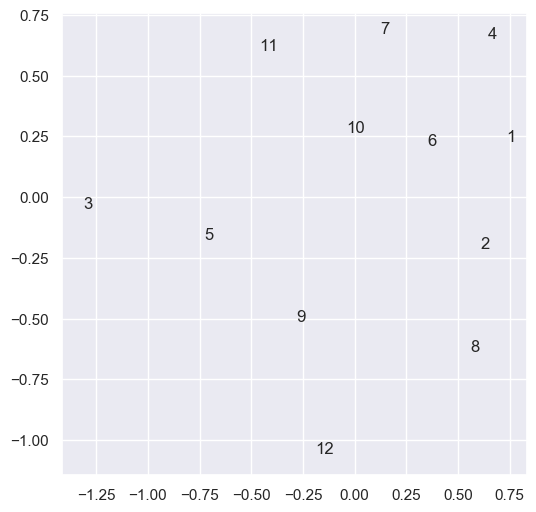

In [321]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

Also for **non-stop words**, the distance between conversation is higher, which makes sense especially in the conversation setting that non-stop words constitute a large part of the conversation. But for the following analysis, I will focus on the whole corpora, since non-stop words might also be valualbe in conversation settings.

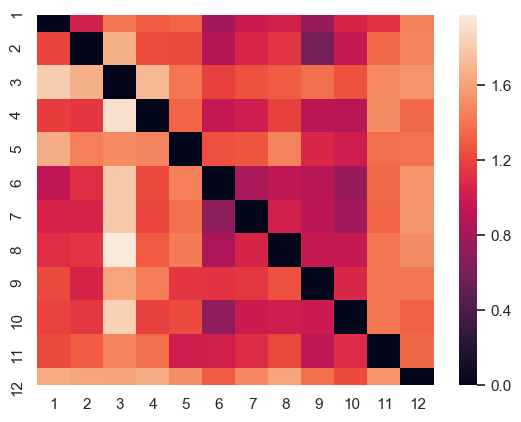

In [327]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the assymmetric $\chi^2$ Divergence:  while for MDS visualization, the pattern is quite different from what we got with KL, generally there are two clusters of conversations. The right cluster contains longer conversations (1,4,6,7,10). 

In [337]:
df_con[['condition','word_counts']]

,condition,word_counts
0,NB,592
1,TYB,393
2,NB,348
3,TYB,550
4,TYB,230
5,TYB,654
6,NB,510
7,NB,374
8,TYB,229
9,TYB,507


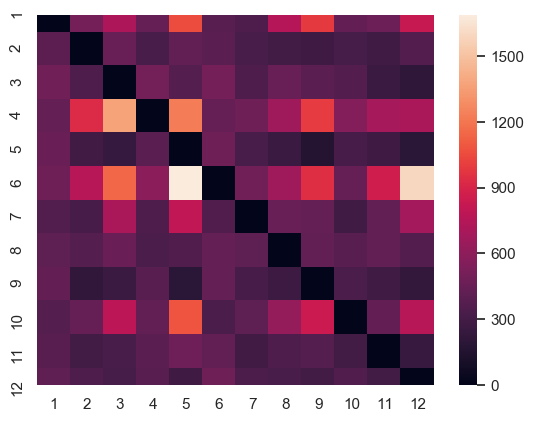

In [328]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


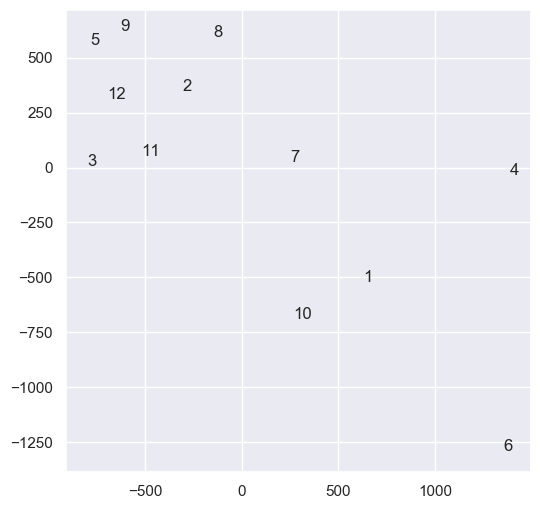

In [329]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

For the KS distance:

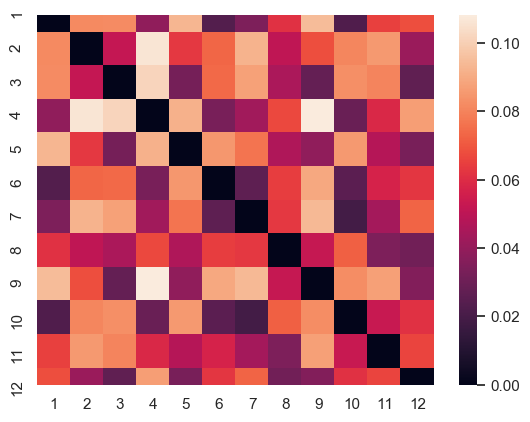

In [333]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


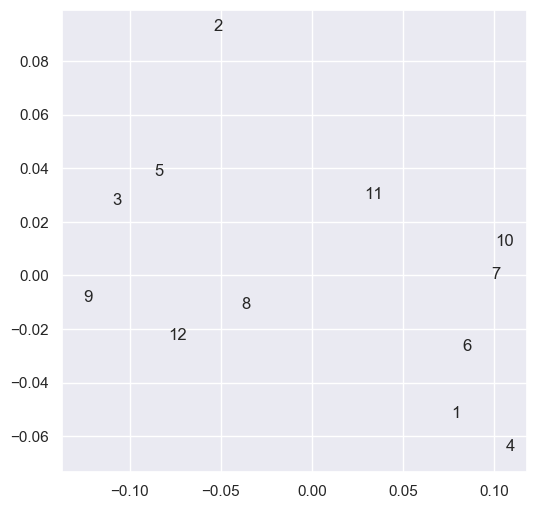

In [334]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

For the Wasserstein or "earth mover's" Distance: the MDS shows a more separate results between of two clusters conversation. From the dataframe info, we could see that, the upper cluster contains the conversations of longer length (>500words), distinctive from the other ones.

In [337]:
df_con[['condition','word_counts']]

,condition,word_counts
0,NB,592
1,TYB,393
2,NB,348
3,TYB,550
4,TYB,230
5,TYB,654
6,NB,510
7,NB,374
8,TYB,229
9,TYB,507


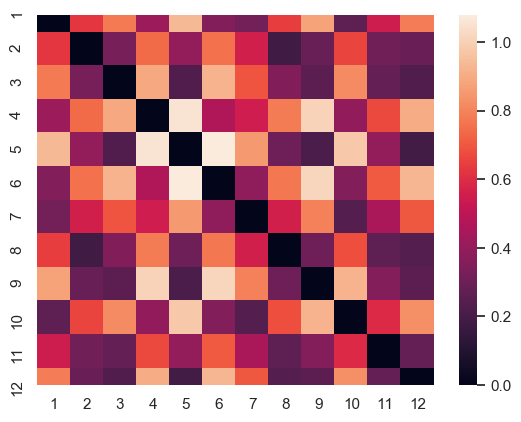

In [335]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


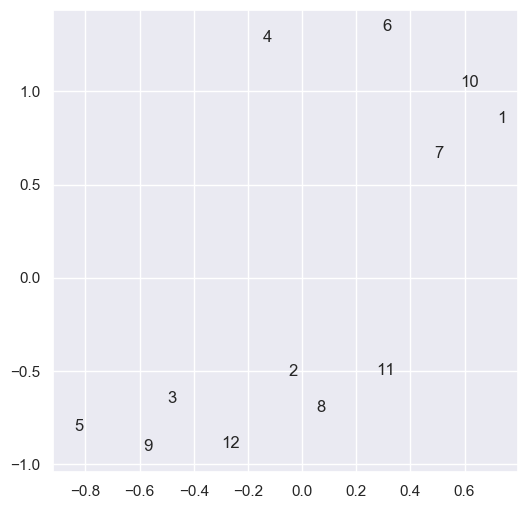

In [336]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

And finally for the Jensen Shannon Distance: also according to the MDS visualization, we could see a clear separation between longer conversation and the other conversation. 

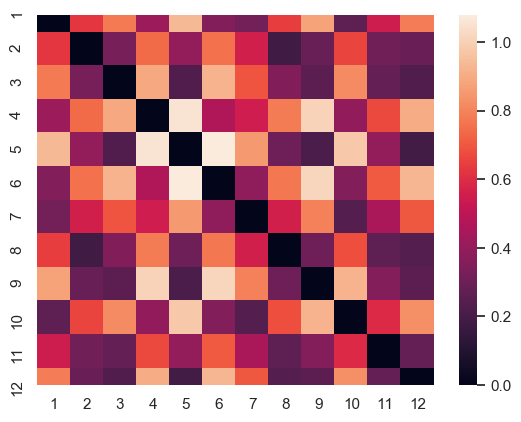

In [338]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


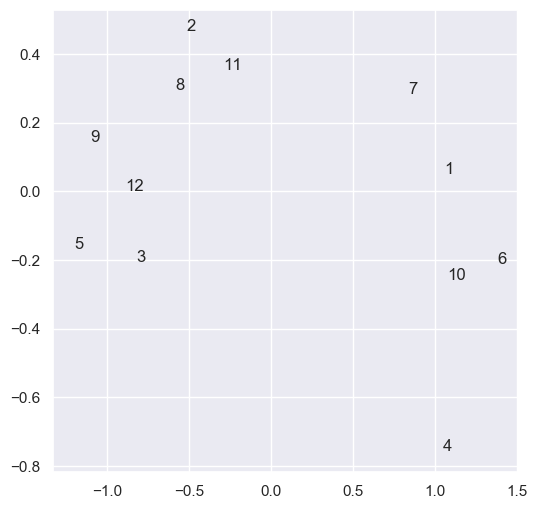

In [339]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

Overall, except for KL method, all the other methods (JS/KS/chi-square) succesffully separate conversations based on their length. 500~words conversations were clustered together; while it is unclear why KL is different from the other methods and what feature of conversation causes the different pattern.

#### Difference between TYB/NB conditions and PersonA/B:
Another thing interesting to test is the distance between conditions and persons: 

In [340]:
tybWords = set(df_con[df_con['condition']=='TYB']['normalized_token_all'].sum())
nbWords = set(df_con[df_con['condition']=='NB']['normalized_token_all'].sum())

#Change & to | if you want to keep all words
overlapWords = tybWords & nbWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict

{'think': 0,
 'student': 1,
 'have': 2,
 'punish': 3,
 'know': 4,
 'yea': 5,
 'easy': 6,
 'lot': 7,
 'learn': 8,
 'ah': 9,
 'sense': 10,
 'crime': 11,
 'intention': 12,
 'strong': 13,
 'need': 14,
 'family': 15,
 'abolish': 16,
 'use': 17,
 'hm': 18,
 'mean': 19,
 'follow': 20,
 'time': 21,
 'okay': 22,
 'bit': 23,
 'case': 24,
 'obviously': 25,
 'sort': 26,
 'ya': 27,
 'cause': 28,
 'right': 29,
 'make': 30,
 'kind': 31,
 'research': 32,
 'important': 33,
 'little': 34,
 'topic': 35,
 'focus': 36,
 'yeah': 37,
 'commit': 38,
 'change': 39,
 'encourage': 40,
 'conversation': 41,
 'reason': 42,
 'certain': 43,
 'agree': 44,
 'specifically': 45,
 'yea--': 46,
 'mm': 47,
 'happen': 48,
 'clarify': 49,
 'work': 50,
 'answer': 51,
 'feel': 52,
 'legal': 53,
 'go': 54,
 'find': 55,
 'way': 56,
 'person': 57,
 'like': 58,
 'life': 59,
 'believe': 60,
 'especially': 61,
 'talk': 62,
 'definitely': 63,
 'die': 64,
 'look': 65,
 'thing': 66,
 'cost': 67,
 'want': 68,
 'laugh': 69,
 'personally':

Make probability array, and also make dictionary for each condition:

In [355]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    count_dic={}
    for word in words:
        try:
            countList[overlapDict[word]] += 1
            if word in count_dic:
                count_dic[word]+=1
            else: 
                count_dic[word]=1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum(),count_dic

tybProbArray,tybDict = makeProbsArray(df_con[df_con['condition']=='TYB']['normalized_token_all'], overlapWordsDict)
nbProbArray,nbDict = makeProbsArray(df_con[df_con['condition']=='NB']['normalized_token_all'], overlapWordsDict)

Calculate the distance between TYB and NB conversation corporus:

In [346]:
tyb_nbDivergence = scipy.stats.entropy(tybProbArray, nbProbArray)
print ('tyb_nb',tyb_nbDivergence)
nb_tybDivergence = scipy.stats.entropy(nbProbArray, tybProbArray)
print ('nb_tyb',nb_tybDivergence)

M=(nbProbArray+tybProbArray)/2
tyb_nbDivergence_js = 0.5*scipy.stats.entropy(nbProbArray, M)+0.5*scipy.stats.entropy(tybProbArray,M)
print ('tyb_nb_JS',tyb_nbDivergence_js)

tyb_nb 0.24509533135711045
nb_tyb 0.2631975649461092
tyb_nb_JS 0.05716031033887088


Find the words distinguish the two conditions best by elementwise calculation: 

the result is very interesting, 'laugh','yeah','uhh', 'sense' (possibly with 'make sense'),also 'perspective'(possibly for mutual understanding), which are all more positive/affirmative communication cues and appear more in TYB (Thank you because) condition. From this preliminary analysis, we could infer that in TYB condition, people tend to laugh more, agree and confirm more. 

In [345]:
tyb_nbDivergence_ew = scipy.special.kl_div(tybProbArray, nbProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = tyb_nbDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
69,laugh,0.024812
37,yeah,0.019374
54,go,0.016485
88,uhh,0.013713
10,sense,0.011504
31,kind,0.009221
59,life,0.008646
22,okay,0.008539
1,student,0.007098
81,perspective,0.007003


In [359]:
print('tyb_laugh:',tybDict['laugh'])
print('nb_laugh:',nbDict['laugh'])

tyb_laugh: 14
nb_laugh: 1


In [360]:
print('yeah:',tybDict['yeah'])
print('yeah:',nbDict['yeah'])

yeah: 47
yeah: 13


Furthermore, we could examine the role difference in TYB condition (Person A is instructed to state 'Thank you because', while B is not), between PersonA and PersonB:

In [363]:
tyb_paWords = set(df_con[df_con['condition']=='TYB']['normalized_token_A'].sum())
tyb_pbWords = set(df_con[df_con['condition']=='TYB']['normalized_token_B'].sum())

#Change & to | if you want to keep all words
overlapWords = tyb_paWords & tyb_pbWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}

Make probability array, and also make dictionary for each condition:

In [364]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    count_dic={}
    for word in words:
        try:
            countList[overlapDict[word]] += 1
            if word in count_dic:
                count_dic[word]+=1
            else: 
                count_dic[word]=1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum(),count_dic

tyb_paProbArray,tyb_paDict = makeProbsArray(df_con[df_con['condition']=='TYB']['normalized_token_A'], overlapWordsDict)
tyb_pbProbArray,tyb_pbDict = makeProbsArray(df_con[df_con['condition']=='TYB']['normalized_token_B'], overlapWordsDict)

Calculate the distance between PersonA and PersonB conversation corporus in TYB condition: the difference is generally the same and a little bit smaller between conditions.

In [366]:
pa_pbDivergence = scipy.stats.entropy(tyb_paProbArray, tyb_pbProbArray)
print ('pa_pb',tyb_nbDivergence)
pb_paDivergence = scipy.stats.entropy(tyb_pbProbArray, tyb_paProbArray)
print ('pb_pa',nb_tybDivergence)

M=(tyb_pbProbArray+tyb_paProbArray)/2
papbDivergence_js = 0.5*scipy.stats.entropy(tyb_paProbArray, M)+0.5*scipy.stats.entropy(tyb_pbProbArray,M)
print ('pa_pb_JS',papbDivergence_js)

pa_pb 0.24509533135711045
pb_pa 0.2631975649461092
pa_pb_JS 0.04886691157986328


Find the words distinguish the two conditions best by elementwise calculation: 

The cell immediately below shows the words Person A said most often different from Person B, the cell below the cell shows the words Person B stated more different from Person A. We could see that, positive/affirmative expressions are not very different between A and B, which indicates the strategy taught to A might transform to B and influence both speakers, which should be examined with more detail in the future analysis.

In [370]:
papbDivergence_ew = scipy.special.kl_div(tyb_paProbArray, tyb_pbProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = papbDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
0,think,0.015266
9,sense,0.014206
66,maybe,0.010895
13,mean,0.010895
45,way,0.010895
72,say,0.010407
61,uh,0.009138
25,kind,0.008138
81,guess,0.007185
47,like,0.007003


In [371]:
papbDivergence_ew = scipy.special.kl_div(tyb_pbProbArray, tyb_paProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = papbDivergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
25,kind,0.013309
0,think,0.012293
83,strongly,0.011718
1,fast,0.011718
81,guess,0.009967
9,sense,0.008212
47,like,0.007600
42,go,0.007376
39,feel,0.006987
72,say,0.006987


In [368]:
print('pa_think:',tyb_paDict['think'])
print('pb_think:',tyb_pbDict['think'])

pa_think: 43
pb_think: 15


In [203]:
df_con.head()

,condition,conversation_txt,con_txt_A,con_txt_B,tokenized_text_all,tokenized_text_A,tokenized_text_B,word_counts,normalized_token_all,normalized_token_A,...,normalized_tokens_POS,sentences_all,sentences_A,sentences_B,POS_sents_all,POS_sents_A,POS_sents_B,classified_sents_all,classified_sents_A,classified_sents_B
0,NB,"Okay, so uh, I guess they said we should start...","Okay, so uh, I guess they said we should start...","Yea, we should start Um, yeah. I actually didn...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Okay, so, uh, I, guess, they, said, we, shoul...","[Yea, we, should, start, Um, yeah, I, actually...",592,"[okay, uh, guess, say, start, yea, start, uh, ...","[okay, uh, guess, say, start, uh, say, topic, ...",...,"[(okay, UH), (,, ,), (so, RB), (uh, UH), (,, ,...","[[Okay, so, uh, I, guess, they, said, we, shou...","[[Okay, so, uh, I, guess, they, said, we, shou...","[[Yea, we, should, start, Um], [yeah], [I, act...","[[(Okay, UH), (so, RB), (uh, UH), (I, PRP), (g...","[[(Okay, UH), (so, RB), (uh, UH), (I, PRP), (g...","[[(Yea, RB), (we, PRP), (should, MD), (start, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [(US, GPE...","[[], [], [], [], [], [], [], [], [], [], []]"
1,TYB,"So I don't really I think I said--yes, everyon...","So I don't really I think I said--yes, everyon...",I-I think put something that's below five.. Th...,"[So, I, do, n't, really, I, think, I, said, ye...","[So, I, do, n't, really, I, think, I, said, ye...","[I, I, think, put, something, that, 's, below,...",393,"[think, say, yes, think, oh, okay, uhhm, think...","[think, say, yes, oh, okay, uhhm, think, reaso...",...,"[(so, CC), (i, PRP), (do, VBP), (n't, RB), (re...","[[So, I, do, n't, really], [I, think, I, said-...","[[So, I, do, n't, really], [I, think, I, said-...","[[I], [-I, think, put, something, that, 's, be...","[[(So, RB), (I, PRP), (do, VBP), (n't, RB), (r...","[[(So, RB), (I, PRP), (do, VBP), (n't, RB), (r...","[[(I, PRP), (-I, :), (think, VBP), (put, VBD),...","[[], [], [], [], [(five, CARDINAL)], [(Three o...","[[], [], [], [], [], [], [], [(10, CARDINAL)],...","[[(five, CARDINAL), (Three or, CARDINAL), (fou..."
2,NB,"Uh, so, uh I-I actually uh read a lot about th...",Ok and so what does the law say? Does it say l...,"Uh, so, uh I-I actually uh read a lot about th...","[Uh, so, uh, I, I, actually, uh, read, a, lot,...","[Ok, and, so, what, does, the, law, say, Does,...","[Uh, so, uh, I, I, actually, uh, read, a, lot,...",348,"[uh, uh, actually, uh, read, lot, topic, uh, u...","[ok, law, like, study, ok, umm, thing, think, ...",...,"[(uh, UH), (,, ,), (so, CC), (,, ,), (uh, UH),...","[[Uh, so, uh, I], [-I, actually, uh, read, a, ...","[[Ok], [and, so, what, does, the, law, say], [...","[[Uh, so, uh, I], [-I, actually, uh, read, a, ...","[[(Uh, UH), (so, RB), (uh, UH), (I, PRP), (-I,...","[[(Ok, UH)], [(and, CC), (so, RB), (what, WP),...","[[(Uh, UH), (so, RB), (uh, UH), (I, PRP), (-I,...","[[(the Supreme Court, ORG)], [], [], [], [], [...","[[], [], [], [], [], []]","[[(the Supreme Court, ORG)], [], [], [(the Civ..."
3,TYB,Okay so you--What's your opinion on this? I st...,Okay so you--What's your opinion on this? Oh w...,I strongly disagree with this I think you shou...,"[Okay, so, you, What, 's, your, opinion, on, t...","[Okay, so, you, What, 's, your, opinion, on, t...","[I, strongly, disagree, with, this, I, think, ...",550,"[okay, opinion, strongly, disagree, oh, wow--,...","[okay, opinion, oh, wow--, okay, mean, like, c...",...,"[(okay, UH), (so, IN), (you, PRP), (--, :), (w...","[[Okay], [so, you, What, 's, your, opinion, on...","[[Okay], [so, you, What, 's, your, opinion, on...","[[I, strongly, disagree, with, this, I, think,...","[[(Okay, UH)], [(so, IN), (you, PRP)], [(What,...","[[(Okay, UH)], [(so, IN), (you, PRP)], [(What,...","[[(I, PRP), (strongly, RB), (disagree, VBP), (...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], []